In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
#sub plot concept- provid etwo objects ,, subplots (ttakes rows AND  cols)
# ax is the individual plot  fig is the entire thing

<Axes: xlabel='job_title_short'>

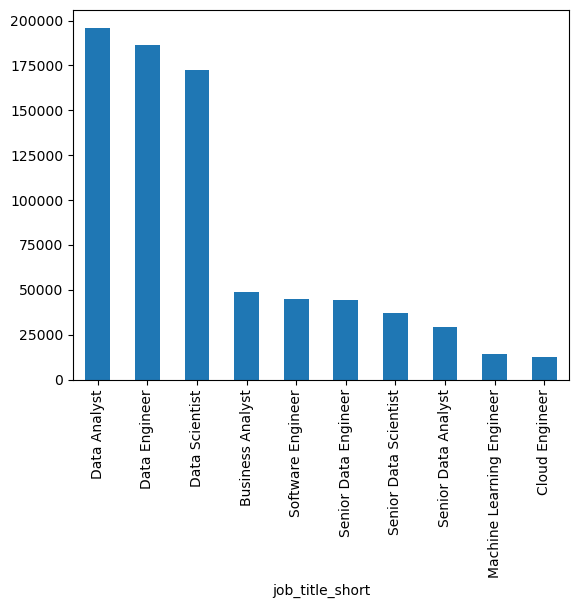

In [12]:
fig, ax= plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar')

In [15]:
df['job_title_short'].value_counts().head(3)

job_title_short
Data Analyst      196075
Data Engineer     186241
Data Scientist    172286
Name: count, dtype: int64

<Axes: xlabel='job_title_short'>

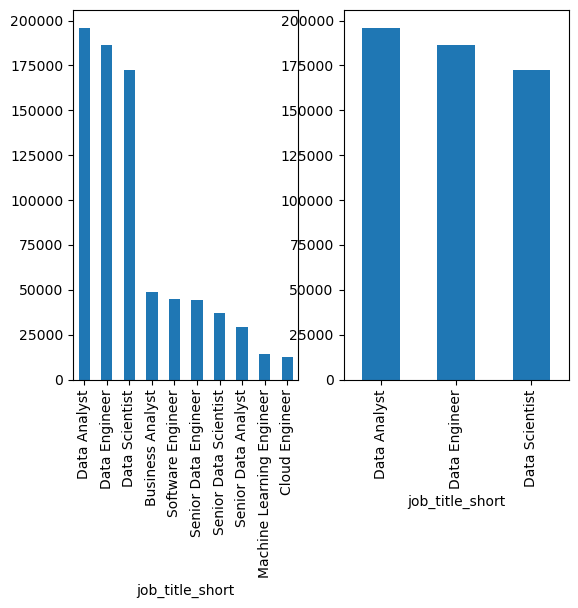

In [16]:
fig,ax=plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_title_short'].value_counts().head(3).plot(kind='bar',ax=ax[1])

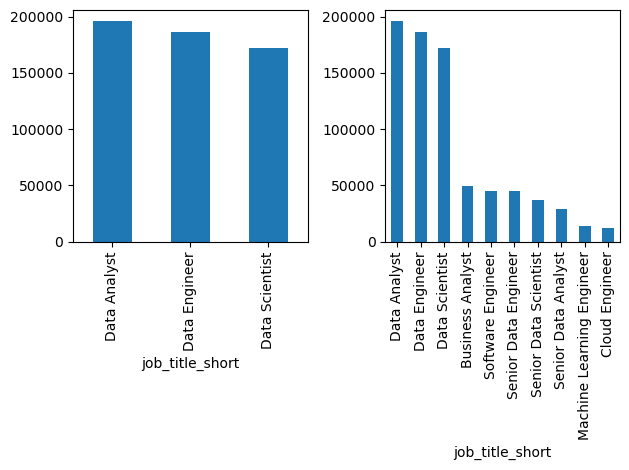

In [19]:
fig,ax=plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[1])
df['job_title_short'].value_counts().head(3).plot(kind='bar',ax=ax[0])

fig.tight_layout()

# example- counts of top skills in job postings

In [23]:
df_skills=df.copy()
df_skills=df_skills.explode('job_skills')

In [25]:
skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=skills_count.reset_index(name='skill_count')



In [28]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [29]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
1723,shogun,Business Analyst,1
447,delphi,Senior Data Scientist,1
2124,visualbasic,Software Engineer,1
450,digitalocean,Business Analyst,1


In [39]:
job_titles=["Data Scientist","Data Engineer","Data Analyst"]

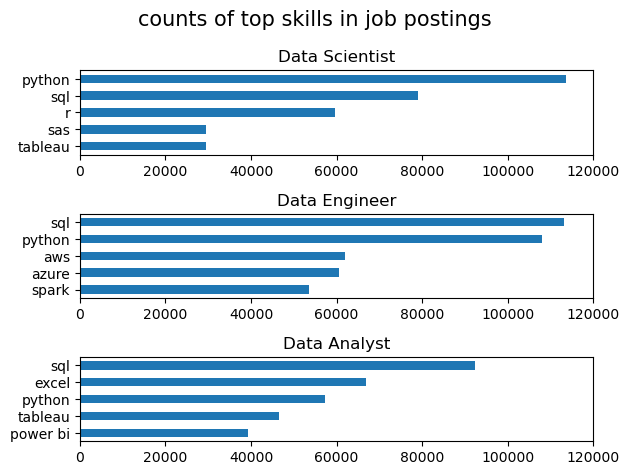

In [52]:
fig,ax =plt.subplots(3,1)

for i,job_title in enumerate(job_titles):
  df_plot=df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
  df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0,120000)
fig.suptitle('counts of top skills in job postings',fontsize=15)
fig.tight_layout()
